In [1]:
from tensorflow import keras
from keras.models import Model,Sequential
from keras.layers import Input, Conv2D,  BatchNormalization, Add, Activation, MaxPooling2D, concatenate, Flatten, Dense, AveragePooling2D, Dropout
from keras.optimizers import Adam, SGD
from keras.datasets import mnist
from keras import applications 
from tensorflow.keras import layers, Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau

In [2]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
dataset_folder = 'training_data'

# List of class names
class_names = ['cats','dogs']

# Load and preprocess images
data = []
labels = []

In [4]:
for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_folder, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)
        img = img.resize((32, 32))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(class_idx)

In [5]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


In [6]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [7]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 4)
y_val = keras.utils.to_categorical(y_val, 4)
y_test = keras.utils.to_categorical(y_test, 4)

checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)


In [8]:
#custom Model
customModel = Sequential()
customModel=Sequential(
    [
        layers.Conv2D(512,3,input_shape=(32,32,3),padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Flatten(),

        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(4,activation='softmax'),
    ]
)

In [9]:
customModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

customModel.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 512)       14336     
                                                                 
 batch_normalization (Batch  (None, 32, 32, 512)       2048      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 512)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       1179904   
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       590080    
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 256)     

In [10]:
y_train.shape

(6400, 4)

In [11]:
history = customModel.fit(
    x_train,y_train,
    epochs=35,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint,early_stopping])

Epoch 1/35


200/200 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.5612

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


200/200 [==============================] - 134s 662ms/step - loss: 0.6961 - accuracy: 0.5612 - val_loss: 0.6896 - val_accuracy: 0.5394
Epoch 2/35
200/200 [==============================] - 125s 623ms/step - loss: 0.6326 - accuracy: 0.6403 - val_loss: 0.8039 - val_accuracy: 0.4944
Epoch 3/35
200/200 [==============================] - 58s 288ms/step - loss: 0.5822 - accuracy: 0.7003 - val_loss: 0.6081 - val_accuracy: 0.6794
Epoch 4/35
200/200 [==============================] - 58s 292ms/step - loss: 0.5420 - accuracy: 0.7337 - val_loss: 0.6881 - val_accuracy: 0.6419
Epoch 5/35
200/200 [==============================] - 62s 310ms/step - loss: 0.5075 - accuracy: 0.7528 - val_loss: 1.1929 - val_accuracy: 0.5569
Epoch 6/35
200/200 [==============================] - 68s 341ms/step - loss: 0.4732 - accuracy: 0.7805 - val_loss: 0.6710 - val_accuracy: 0.6800
Epoch 7/35
200/200 [==============================] - 68s 340ms/step - loss: 0.4444 - accuracy: 0.7980 - val_loss: 0.6614 - val_accuracy: 0

In [15]:
val_loss, val_acc = customModel.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

50/50 [==============================] - 3s 70ms/step - loss: 1.4314 - accuracy: 0.7706
Validation accuracy :  0.7706249952316284


In [16]:
import matplotlib.pyplot as plt

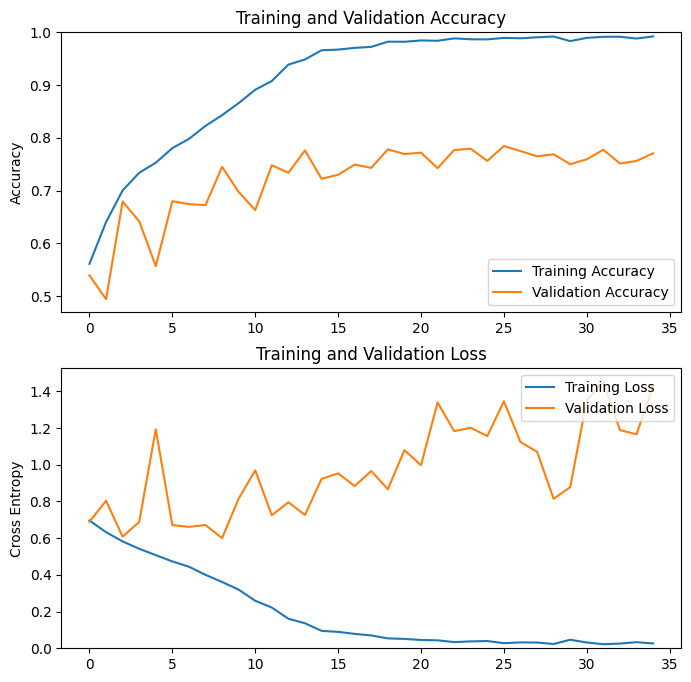

In [17]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [22]:
score = customModel.evaluate(x_test, y_test)

63/63 [==============================] - 5s 69ms/step - loss: 1.4838 - accuracy: 0.7710


In [23]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.4837841987609863
Test accuracy: 0.7710000276565552


In [24]:
customModel.save('saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [ ]:
#prediction

In [25]:
import tensorflow as tf
import numpy as np
from PIL import Image
import tensorflow as tf
model = tf.keras.models.load_model('saved_model')

In [26]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    
    # Convert to RGB in case the image has an alpha channel
    img = img.convert('RGB')
    
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [27]:
# List of class names
class_names = ['cats','dogs']

In [30]:
# Predict the class
image_path = 'predictions/cat_or_dog_1.jpg'
input_image = preprocess_image(image_path)
predictions = model.predict(input_image)

predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)

1/1 [==============================] - 0s 27ms/step
Predicted class: dogs


In [31]:
image_path = 'predictions/cat_or_dog_2.jpg'
input_image = preprocess_image(image_path)
predictions = model.predict(input_image)

predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)

1/1 [==============================] - 0s 24ms/step
Predicted class: cats
